In [2]:
import pandas               as pd
import numpy                as np
import matplotlib.pyplot    as plt

In [3]:
df = pd.read_csv("ted_main.csv")
df;

In [9]:
duration = list(df['duration'])

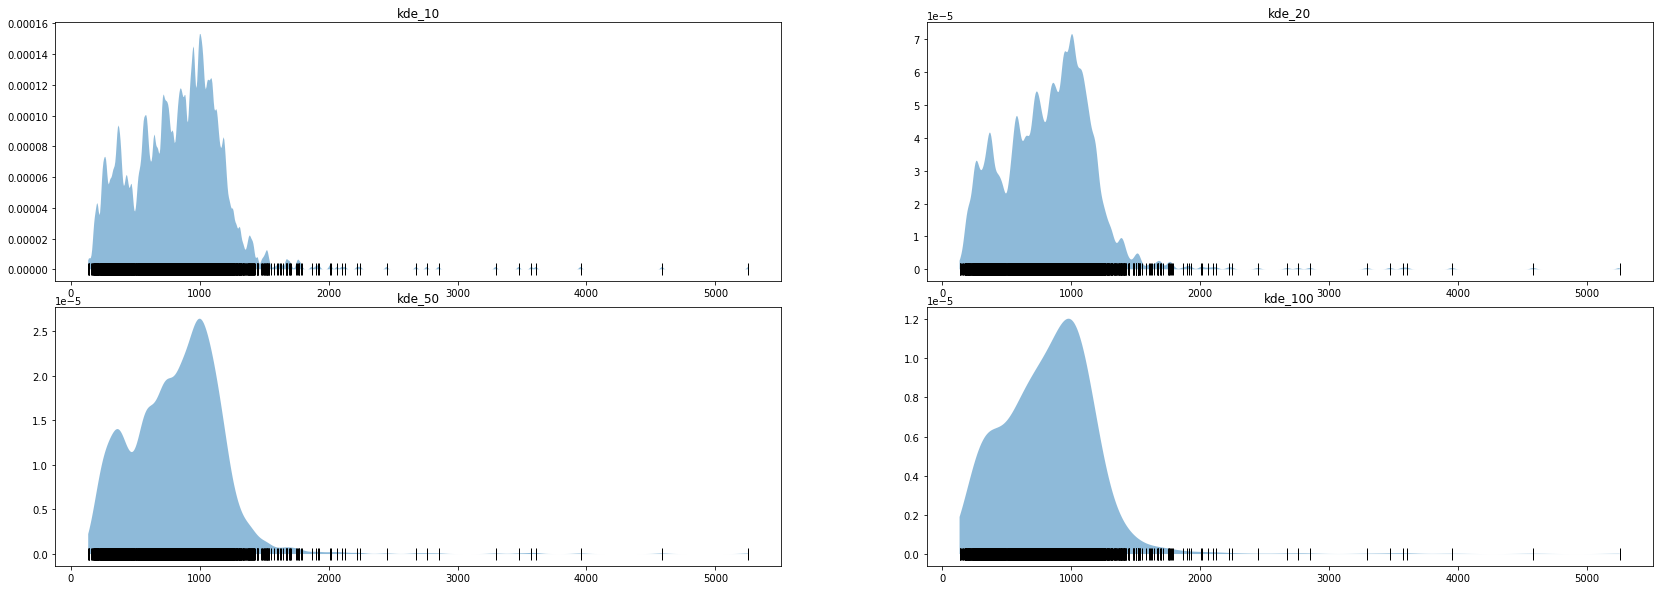

In [24]:
def gaussian_kernel(x, x_i, h):
    
    """
    h=variance
    x_i=mean
    Gaussian kernel function.
    """
    return np.exp(-(x - x_i) ** 2 / (2 * h ** 2)) / (np.sqrt(2 * np.pi) * h)

def kernel_density_estimation(x, X, h):
    """
    Kernel density estimation function.
    """
    n = X.shape[0]
    densities = np.zeros_like(x)

    for i in range(n):
        densities += gaussian_kernel(x, X[i], h)

    return densities / (n * h)

# # Generate some random data
# np.random.seed(0)
# # X = np.concatenate((np.random.normal(0, 1, 100), np.random.normal(5, 1, 100)))
# X = np.random.normal(0, 1, len(dur))

# Create a range of points to evaluate the KDE
x_plot = np.linspace(dur.min(), dur.max(), 1000)

# Compute the KDE using a Gaussian kernel with bandwidth of 0.5
kde_10  = kernel_density_estimation(x_plot, dur, 10 )
kde_20  = kernel_density_estimation(x_plot, dur, 20 )
kde_50  = kernel_density_estimation(x_plot, dur ,50 )
kde_100 = kernel_density_estimation(x_plot, dur, 100)

# Plot the results

fig, ax         = plt.subplots(nrows = 2, ncols = 2, figsize=(25, 10))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.2, hspace = 0.1)

ax[0][0].fill_between(x_plot, kde_10, alpha=0.5)
ax[0][0].plot(dur, np.zeros_like(dur), '|', color='k', markersize=12)
ax[0][0].set_title('kde_10')

ax[0][1].fill_between(x_plot, kde_20, alpha=0.5)
ax[0][1].plot(dur, np.zeros_like(dur), '|', color='k', markersize=12)
ax[0][1].set_title('kde_20')

ax[1][0].fill_between(x_plot, kde_50, alpha=0.5)
ax[1][0].plot(dur, np.zeros_like(dur), '|', color='k', markersize=12)
ax[1][0].set_title('kde_50')

ax[1][1].fill_between(x_plot, kde_100, alpha=0.5)
ax[1][1].plot(dur, np.zeros_like(dur), '|', color='k', markersize=12)
ax[1][1].set_title('kde_100')
plt.show()

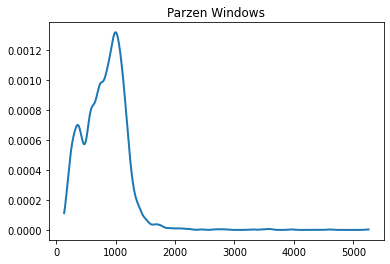

In [33]:
from sklearn.neighbors import KernelDensity

duration    = df['duration'].astype(int).to_numpy().reshape(-1,1)
x           = np.linspace(duration.min(), duration.max(), 1000).reshape(-1,1)
kde         = KernelDensity(kernel='gaussian', bandwidth=50)
kde.fit(duration)
y           = np.exp(kde.score_samples(x))

plt.plot(x,y, linewidth = 2)
plt.title('Parzen Windows')
plt.show()

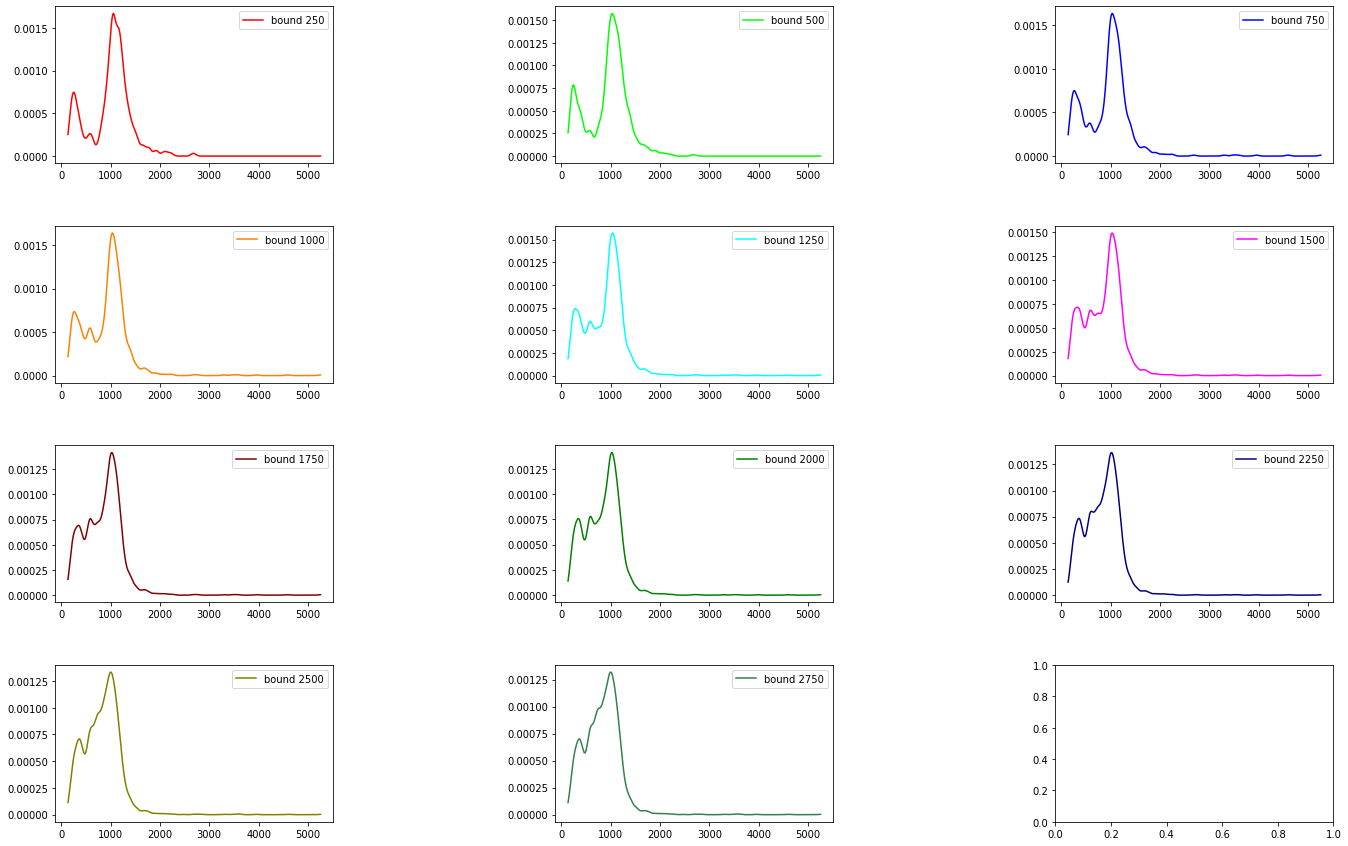

In [49]:
bound = list(range(250, len(duration) + 250, 250))
fig, axs = plt.subplots(4, 3, figsize=(20, 15))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.8, hspace = 0.4)
color = [[1  , 0  , 0  ], 
         [0  , 1  , 0  ], 
         [0  , 0  , 1  ], 
         [1  , 0.5, 0  ], 
         [0  , 1  , 1  ], 
         [1  , 0  , 1  ], 
         [0.5, 0  , 0  ], 
         [0  , 0.5, 0  ], 
         [0  , 0  , 0.5], 
         [0.5, 0.5, 0  ], 
         [0.2, 0.5, 0.3]]

for i, b, c in zip(range(11), bound, color):
    dur = duration[:b]
    kde.fit(dur)
    y   = np.exp(kde.score_samples(x))
    row = i // 3  # integer division to get row index
    col = i % 3   # modulo to get column index
    axs[row, col].plot(x, y, label=f'bound {b}', c = c)
    axs[row, col].legend()

plt.show()